# A Classifier Which Classifies on MNIST with over 97% accuracy.

## Download and Load the Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

/home/praddyumnyadav/PraddyumnYadav/MachineLearning/2. Classification_MNIST/venv/lib64/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Divide Input and Label

In [2]:
X, y = mnist["data"], mnist["target"]
X = X.to_numpy()
y = y.to_numpy()
print(f"Shape of X = {X.shape}")
print(f"Shape of y = {y.shape}")

Shape of X = (70000, 784)
Shape of y = (70000,)


## Take a Look on the Dataset

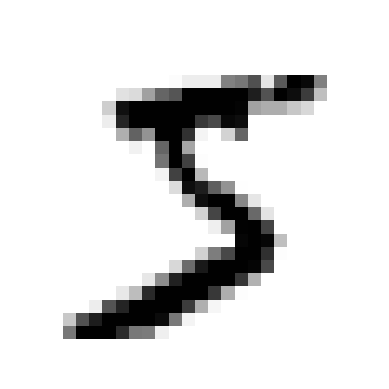

In [3]:
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
y[0]

'5'

In [5]:
import numpy as np

y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

# Split Train and Test Set

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Train KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
knn_clf.predict([some_digit])

array([5], dtype=uint8)

## Test KNeighborsClassifier

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [10]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average="macro")

0.967895609653832

In [11]:
recall_score(y_train, y_train_pred, average="macro")

0.9669341316176434

In [12]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="macro")

0.9672164755274896

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

# Error Analysis

In [14]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

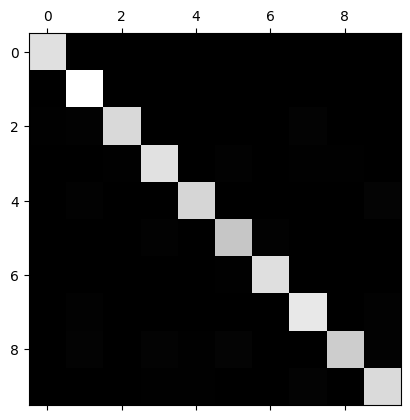

In [15]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [16]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

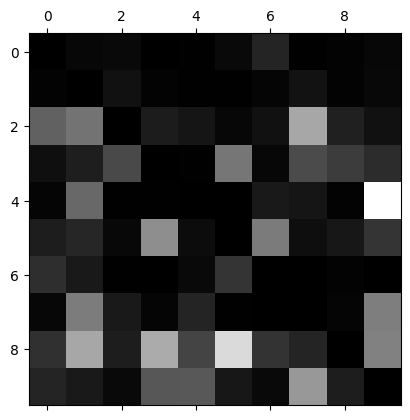

In [17]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Fine Tune My KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be searched
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search the hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Train the KNeighborsClassifier model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [19]:
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

array([0.9704, 0.9689, 0.9687])

In [20]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
f1_score(y_train, y_train_pred, average="macro")

0.9691263353762144

As You Have Seen I Have Tried My Best to Solve This Problem But i am missing With 0.001% Accuracy so I Will Work on This in Future But for now i am going to save This Model With joblib.

# Save Fine-Tuned KNeighborsClassifier

In [21]:
import joblib

joblib.dump(knn, "mnist_classifier_96.pkl")

['mnist_classifier_96.pkl']

In [22]:
final_model_loaded = joblib.load("mnist_classifier_96.pkl")
final_model_loaded.predict([some_digit])

array([5], dtype=uint8)

You Can See it is Working Fine Thats all for This Exercise.